#［例题3-1] 
假设我们试图对某一社区中个人的受教育程度(X=edu)对年平均收入(Y = earn)的影响进行研究。我们从该社区中随机地收集到11名个体的受教育年限（单位：年）和年平均收入（单位：千元）数据（见表3-4)。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X=np.array([6,10,9,9,16,12,16,5,10,12,8])
Y=np.array([5,7,6,6,9,8,13,5,10,12,10])
df=pd.DataFrame([X,Y]).T
df.columns=['edu','earn']
df.head()

,edu,earn
0,6,5
1,10,7
2,9,6
3,9,6
4,16,9


利用该数据：
（1）判断最佳拟合直线方程；
(2)	计算直线的拟合优度;

coefficient of determination: 0.5123905552536916
y=0.56x+2.56


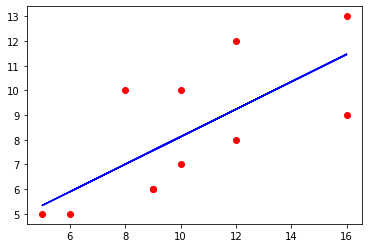

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X.reshape((-1,1)),Y)
r_sq = model.score(X.reshape((-1,1)),Y)
print('coefficient of determination:', r_sq)
print('y={}x+{}'.format(round(model.coef_[0],2) , round(model.intercept_,2)))
plt.scatter(X,Y,color='red')
plt.plot(X, model.predict(X.reshape(-1,1)), color='blue')
plt.show()

In [3]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9.457
Date:                Tue, 16 Nov 2021   Prob (F-statistic):             0.0132
Time:                        06:33:57   Log-Likelihood:                -22.302
No. Observations:                  11   AIC:                             48.60
Df Residuals:                       9   BIC:                             49.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5591      1.956      1.308      0.2

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


(3)检验数据是否支持年平均收入受到个人受教育程度的影响（显著度a =0.05)

（4）在95％置信水平下，估计受教育年限为12年者的年平均收入；

（5）预测当edu =20时，某个人的年平均收入。